# Le seguenti celle fanno il calcolo della distanza di una coordinata sul file SPT-CL_J2344-4243_band3_combined.dat.im.image.fits

La prima cella fa un import dei package necessari. La seconda definisce una funzione con tutte le eccezioni del caso e restituisce 3 distanze: [distanza in pixel, distanza in gradi, distanza in radianti]. 

Gli argomenti della funzione sono: il file fits su cui basarsi, le coordinate x e y dei due punti (per il secondo punto ci sono dei valori di default che sono quelli del reference point nell'header del file) di cui calcolare la distanza, l'unità di misura con cui sono espresse queste coordinate. Quest'ultima può essere in pixel ('pixel'), gradi sessagesimali ('angle_deg') o radianti ('angle_rad').

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def distance_calc(fil, x_1 , y_1 , x_0=-9999999.9 , y_0=-9999999.9 , scale='pixel'):
    if scale in ['pixel' , 'angle_rad' , 'angle_deg']:
        
        sci=fits.open(fil)[0]
        hdr=sci.header
        dat=sci.data
        if scale=='pixel':
            if (x_0 , y_0)==(-9999999.9 , -9999999.9):
                x_0 = hdr['CRPIX1']
                y_0 = hdr['CRPIX2']
        
            if x_1 in np.arange (0, float(hdr['NAXIS1'])) and y_1 in np.arange (0, float(hdr['NAXIS2'])):
                
                    
                if x_0 in np.arange (0, float(hdr['NAXIS1'])) and y_0 in np.arange (0, float(hdr['NAXIS2'])):
                    
                        
                    dist_x = float(x_1) - float(x_0)
                    dist_y = float(y_1) - float(y_0)
                    dist_pix = np.sqrt((1.0*dist_x)**2 + (1.0*dist_y)**2)
                    dist_deg = np.sqrt((float(hdr['CDELT1'])*dist_x)**2 + (float(hdr['CDELT2'])*dist_y)**2)
                    dist_rad = dist_deg*np.pi/180.0
                    dist = [dist_pix , dist_deg , dist_rad]
                else:
                    print("Centre coordinates are out of range. ")
                    dist=[np.nan , np.nan , np.nan]
            else:
                print("Given point's coordinates are out of range. ")
                dist=[np.nan , np.nan , np.nan]
        elif scale=='angle_deg':
            if (x_0 , y_0)==(-9999999.9 , -9999999.9):
                x_0 = hdr['CRVAL1']
                x_0 = hdr['CRVAL2']
                
            if x_1 in np.arange (float(hdr['CRVAL1']) - float(hdr['CRPIX1'])*float(hdr['CDELT1']) , float(hdr['CRVAL1']) + (float(hdr['NAXIS1']) - float(hdr['CRPIX1']))*float(hdr['CDELT1'])) and y_1 in np.arange (float(hdr['CRVAL2']) - float(hdr['CRPIX2'])*float(hdr['CDELT2']) , float(hdr['CRVAL2']) + (float(hdr['NAXIS2']) - float(hdr['CRPIX2']))*float(hdr['CDELT2'])):                
                if x_0 in np.arange (float(hdr['CRVAL1']) - float(hdr['CRPIX1'])*float(hdr['CDELT1']) , float(hdr['CRVAL1']) + (float(hdr['NAXIS1']) - float(hdr['CRPIX1']))*float(hdr['CDELT1'])) and y_0 in np.arange (float(hdr['CRVAL2']) - float(hdr['CRPIX2'])*float(hdr['CDELT2']) , float(hdr['CRVAL2']) + (float(hdr['NAXIS2']) - float(hdr['CRPIX2']))*float(hdr['CDELT2'])):
                    dist_x = float(x_1) - float(x_0)
                    dist_y = float(y_1) - float(y_0)
                    dist_deg = np.sqrt((1.0*dist_x)**2 + (1.0*dist_y)**2)
                    dist_pix = np.sqrt((dist_x/float(hdr['CDELT1']))**2 + (dist_y/float(hdr['CDELT2']))**2)
                    dist_rad = dist_deg*np.pi/180.0
                    dist = [dist_pix , dist_deg , dist_rad]
                else:
                    print("Centre coordinates are out of range. ")
                    dist=[np.nan , np.nan , np.nan]
            else:
                print("Given point's coordinates are out of range. ")
                dist=[np.nan , np.nan , np.nan]     
        elif scale=='angle_rad':
            if (x_0 , y_0)==(-9999999.9 , -9999999.9):
                x_0 = hdr['CRVAL1']*np.pi/180.0
                x_0 = hdr['CRVAL2']*np.pi/180.0
                
            if x_1 in np.arange (float(hdr['CRVAL1'])*np.pi/180.0 - float(hdr['CRPIX1'])*float(hdr['CDELT1'])*np.pi/180.0 , float(hdr['CRVAL1'])*np.pi/180.0 + (float(hdr['NAXIS1']) - float(hdr['CRPIX1']))*float(hdr['CDELT1'])*np.pi/180.0) and y_1 in np.arange (float(hdr['CRVAL2'])*np.pi/180.0 - float(hdr['CRPIX2'])*float(hdr['CDELT2'])*np.pi/180.0 , float(hdr['CRVAL2'])*np.pi/180.0 + (float(hdr['NAXIS2']) - float(hdr['CRPIX2']))*float(hdr['CDELT2'])*np.pi/180.0):                
                if x_0 in np.arange (float(hdr['CRVAL1'])*np.pi/180.0 - float(hdr['CRPIX1'])*float(hdr['CDELT1'])*np.pi/180.0 , float(hdr['CRVAL1'])*np.pi/180.0 + (float(hdr['NAXIS1']) - float(hdr['CRPIX1']))*float(hdr['CDELT1'])*np.pi/180.0) and y_0 in np.arange (float(hdr['CRVAL2'])*np.pi/180.0 - float(hdr['CRPIX2'])*float(hdr['CDELT2'])*np.pi/180.0 , float(hdr['CRVAL2'])*np.pi/180.0 + (float(hdr['NAXIS2']) - float(hdr['CRPIX2']))*float(hdr['CDELT2'])*np.pi/180.0):               
                    dist_x = float(x_1) - float(x_0)
                    dist_y = float(y_1) - float(y_0)
                    dist_rad = np.sqrt((1.0*dist_x)**2 + (1.0*dist_y)**2)
                    dist_pix = np.sqrt((dist_x/float(hdr['CDELT1']))**2 + (dist_y/float(hdr['CDELT2']))**2)*180.0/np.pi
                    dist_deg = dist_rad*180.0/np.pi
                    dist = [dist_pix , dist_deg , dist_rad]    
                else:
                    print("Centre coordinates are out of range. ")
                    dist=[np.nan , np.nan , np.nan]
            else:
                print("Given point's coordinates are out of range. ")
                dist=[np.nan , np.nan , np.nan]   
                    
                    
                    
                
               
    else:
        print('Can not work with those units. ')
        print('**'*20)
        print('Scale can be "pixel" (default), "angle_deg" or "angle_rad". ')
        dist=[np.nan, np.nan, np.nan]
    return dist

La cella seguente chiama la function facendole calcolare una distanza fra la coordinata (1000.0, 1000.0) e la coordinata di reference espressa nell'header del file

In [3]:
distance_calc('SPT-CL_J2344-4243_band3_combined.dat.im.image.fits' , 1000.0 , 1000.0 , 200 , 200 , 'pixel')

[1131.370849898476, 0.047140452079106936, 0.0008227560996590225]

La cella seguente definisce una funzione che crea un array con valori di distanza (calcolati umplementando la funzione precedentemente definita) per ogni pixel di un file fits, con tutte le eccezioni del caso. In particolare è ancora un po' ridondante il modo in cui è definita questa funzione rispetto alla precedente (distance_calc)

I vari print() servono semplicemente a tenere traccia del lavoro svolto dalla funzione, e sono usati per controllare che tutto funzioni correttamente.


In [6]:
def r_finder(fil , centre_1='centre_1' , centre_2='centre_2' , scale='pixel' ):
    sci1=fits.open(fil)[0]
    
    if scale in ['pixel' , 'angle_deg' , 'angle_rad']:

        if scale=='pixel':
            if (centre_1 , centre_2)==('centre_1' , 'centre_2'):
                centre_coord=[float(sci1.header['CRPIX1']) , float(sci1.header['CRPIX2'])] 
            else:
                centre_coord=[float(centre_1) , float(centre_2)]
            if centre_coord[0] in np.arange (0 , float(sci1.header['NAXIS1'])) and centre_coord[1] in np.arange (0, float(sci1.header['NAXIS2'])):
                data=np.zeros_like(sci1.data)
                data[:]=sci1.data[:]
                coord_pix=np.zeros_like(sci1.data)
                coord_deg=np.zeros_like(sci1.data)
                coord_rad=np.zeros_like(sci1.data)
                for i in range (0, int(sci1.header['NAXIS1'])):
                    for j in range (0, int(sci1.header['NAXIS2'])):
                        if not np.isnan(sci1.data[i][j]):
                            arr=distance_calc(fil , float(i) , float(j) , centre_coord[0] , centre_coord[1])
                            coord_pix[i][j]=float(arr[0])
                            coord_deg[i][j]=float(arr[1])
                            coord_rad[i][j]=float(arr[2])
                        else:
                            coord_pix[i][j]=np.nan
                            coord_deg[i][j]=np.nan
                            coord_rad[i][j]=np.nan
                    print("Done for " , i , "/" , sci1.header['NAXIS1'])
            else:
                coord_pix[:]= np.nan
                coord_deg[:]= np.nan
                coord_rad[:]= np.nan

        elif scale=='angle_deg':
            if (centre_1 , centre_2)==('centre_1' , 'centre_2'):
                centre_coord=[float(sci1.header['CRVAL1']) , float(sci1.header['CRVAL2'])]
            else:
                centre_coord=[float(centre_1) , float(centre_2)] 
            data=np.zeros_like(sci1.data)
            data[:]=sci.data[:]
            coord_pix=np.zeros_like(sci1.data)
            coord_deg=np.zeros_like(sci1.data)
            coord_rad=np.zeros_like(sci1.data)
            hdr1=sci1.header
            if centre_coord[0] in np.arange (float(hdr1['CRVAL1']) - float(hdr1['CRPIX1'])*float(hdr1['CDELT1']) , float(hdr1['CRVAL1']) + (float(hdr1['NAXIS1']) - float(hdr1['CRPIX1']))*float(hdr1['CDELT1'])) and centre_coord[1] in np.arange (float(hdr1['CRVAL2']) - float(hdr1['CRPIX2'])*float(hdr1['CDELT2']) , float(hdr1['CRVAL2']) + (float(hdr1['NAXIS2']) - float(hdr1['CRPIX2']))*float(hdr1['CDELT2'])):                                  
                for i in range (0, int(sci1.header['NAXIS1'])):
                    for j in range (0, int(sci1.header['NAXIS2'])):
                        if not np.isnan(sci1.data[i][j]):
                            arr=distance_calc(fil , (float(i)-float(sci1.header['CRPIX1']))*float(sci1.header['CDELT1']) + float(sci1.header['CRVAL1']) , (float(j)-float(sci1.header['CRPIX2']))*float(sci1.header['CDELT2']) + float(sci1.header['CRVAL2']) , centre_coord[0] , centre_coord[1] , 'angle_deg')
                            coord_pix[i][j]=float(arr[0])
                            coord_deg[i][j]=float(arr[1])
                            coord_rad[i][j]=float(arr[2])
                        else:
                            coord_pix[i][j]=np.nan
                            coord_deg[i][j]=np.nan
                            coord_rad[i][j]= np.nan
                    print("Done for " , i , "/" , sci1.header['NAXIS1'])
            else:
                coord_pix[:]= np.nan
                coord_deg[:]= np.nan
                coord_rad[:]= np.nan
        elif scale=='angle_rad':
            if (centre_1 , centre_2)==('centre_1' , 'centre_2'):
                centre_coord=[float(sci1.header['CRVAL1'])*np.pi/180.0 , float(sci1.header['CRVAL2'])*np.pi/180.0]
            else:
                centre_coord=[float(centre_1) , float(centre_2)] 
            data=np.zeros_like(sci1.data)
            data[:]=sci.data[:]
            coord_pix=np.zeros_like(sci1.data)
            coord_deg=np.zeros_like(sci1.data)
            coord_rad=np.zeros_like(sci1.data)
            hdr1=sci1.header
            if centre_coord[0] in np.arange (float(hdr1['CRVAL1'])*np.pi/180.0 - float(hdr1['CRPIX1'])*float(hdr1['CDELT1'])*np.pi/180.0 , float(hdr1['CRVAL1'])*np.pi/180.0 + (float(hdr1['NAXIS1']) - float(hdr1['CRPIX1']))*float(hdr1['CDELT1'])*np.pi/180.0) and centre_coord[1] in np.arange (float(hdr1['CRVAL2'])*np.pi/180.0 - float(hdr1['CRPIX2'])*float(hdr1['CDELT2'])*np.pi/180.0 , float(hdr1['CRVAL2'])*np.pi/180.0 + (float(hdr1['NAXIS2']) - float(hdr1['CRPIX2']))*float(hdr1['CDELT2'])*np.pi/180.0):
                for i in range (0, int(sci1.header['NAXIS1'])):
                    for j in range (0, int(sci1.header['NAXIS2'])):

                        if not np.isnan(sci1.data[i][j]):
                            arr=distance_calc(fil , ((float(i)-float(sci1.header['CRPIX1']))*float(sci1.header['CDELT1']) + float(sci1.header['CRVAL1']))*np.pi/180.0 , ((float(j)-float(sci1.header['CRPIX2']))*float(sci1.header['CDELT2']) + float(sci1.header['CRVAL2']))*np.pi/180.0 , centre_coord[0] , centre_coord[1] , 'angle_rad')
                            coord_pix[i][j]=float(arr[0])
                            coord_deg[i][j]=float(arr[1])
                            coord_rad[i][j]=float(arr[2])
                        else:
                            coord_pix[i][j]= np.nan
                            coord_deg[i][j]= np.nan
                            coord_rad[i][j]= np.nan
                    print("Done for " , i , "/" , sci1.header['NAXIS1'] )
            else:
                coord_pix[:]= np.nan
                coord_deg[:]=np.nan
                coord_rad[:]= np.nan
    else:
        print("Can not work with those units.")
        coord_pix=np.zeros_like(sci1.data)
        coord_pix[:]=np.nan
        coord_deg=np.zeros_like(sci1.data)
        coord_deg[:]= np.nan
        coord_rad=np.zeros_like(sci1.data)
        coord_rad[:]=np.nan

           
    
    coord=[]
    coord.append(coord_pix)
    coord.append(coord_deg)
    coord.append(coord_rad)
    return np.array(coord)

In [7]:
r=r_finder('SPT-CL_J2344-4243_band3_combined.dat.im.image.fits')

Done for  0
Done for  1
Done for  2
Done for  3
Done for  4
Done for  5
Done for  6
Done for  7
Done for  8
Done for  9
Done for  10
Done for  11
Done for  12
Done for  13
Done for  14
Done for  15
Done for  16
Done for  17
Done for  18
Done for  19
Done for  20
Done for  21
Done for  22
Done for  23
Done for  24
Done for  25
Done for  26
Done for  27
Done for  28
Done for  29
Done for  30
Done for  31
Done for  32
Done for  33
Done for  34
Done for  35
Done for  36
Done for  37
Done for  38
Done for  39
Done for  40
Done for  41
Done for  42
Done for  43
Done for  44
Done for  45
Done for  46
Done for  47
Done for  48
Done for  49
Done for  50
Done for  51
Done for  52
Done for  53
Done for  54
Done for  55
Done for  56
Done for  57
Done for  58
Done for  59
Done for  60
Done for  61
Done for  62
Done for  63
Done for  64
Done for  65
Done for  66
Done for  67
Done for  68
Done for  69
Done for  70
Done for  71
Done for  72
Done for  73
Done for  74
Done for  75
Done for  76
Done for 

Done for  594
Done for  595
Done for  596
Done for  597
Done for  598
Done for  599
Done for  600
Done for  601
Done for  602
Done for  603
Done for  604
Done for  605
Done for  606
Done for  607
Done for  608
Done for  609
Done for  610
Done for  611
Done for  612
Done for  613
Done for  614
Done for  615
Done for  616
Done for  617
Done for  618
Done for  619
Done for  620
Done for  621
Done for  622
Done for  623
Done for  624
Done for  625
Done for  626
Done for  627
Done for  628
Done for  629
Done for  630
Done for  631
Done for  632
Done for  633
Done for  634
Done for  635
Done for  636
Done for  637
Done for  638
Done for  639
Done for  640
Done for  641
Done for  642
Done for  643
Done for  644
Done for  645
Done for  646
Done for  647
Done for  648
Done for  649
Done for  650
Done for  651
Done for  652
Done for  653
Done for  654
Done for  655
Done for  656
Done for  657
Done for  658
Done for  659
Done for  660
Done for  661
Done for  662
Done for  663
Done for  664
Done f

Done for  1168
Done for  1169
Done for  1170
Done for  1171
Done for  1172
Done for  1173
Done for  1174
Done for  1175
Done for  1176
Done for  1177
Done for  1178
Done for  1179
Done for  1180
Done for  1181
Done for  1182
Done for  1183
Done for  1184
Done for  1185
Done for  1186
Done for  1187
Done for  1188
Done for  1189
Done for  1190
Done for  1191
Done for  1192
Done for  1193
Done for  1194
Done for  1195
Done for  1196
Done for  1197
Done for  1198
Done for  1199
Done for  1200
Done for  1201
Done for  1202
Done for  1203
Done for  1204
Done for  1205
Done for  1206
Done for  1207
Done for  1208
Done for  1209
Done for  1210
Done for  1211
Done for  1212
Done for  1213
Done for  1214
Done for  1215
Done for  1216
Done for  1217
Done for  1218
Done for  1219
Done for  1220
Done for  1221
Done for  1222
Done for  1223
Done for  1224
Done for  1225
Done for  1226
Done for  1227
Done for  1228
Done for  1229
Done for  1230
Done for  1231
Done for  1232
Done for  1233
Done for  

Done for  1740
Done for  1741
Done for  1742
Done for  1743
Done for  1744
Done for  1745
Done for  1746
Done for  1747
Done for  1748
Done for  1749
Done for  1750
Done for  1751
Done for  1752
Done for  1753
Done for  1754
Done for  1755
Done for  1756
Done for  1757
Done for  1758
Done for  1759
Done for  1760
Done for  1761
Done for  1762
Done for  1763
Done for  1764
Done for  1765
Done for  1766
Done for  1767
Done for  1768
Done for  1769
Done for  1770
Done for  1771
Done for  1772
Done for  1773
Done for  1774
Done for  1775
Done for  1776
Done for  1777
Done for  1778
Done for  1779
Done for  1780
Done for  1781
Done for  1782
Done for  1783
Done for  1784
Done for  1785
Done for  1786
Done for  1787
Done for  1788
Done for  1789
Done for  1790
Done for  1791
Done for  1792
Done for  1793
Done for  1794
Done for  1795
Done for  1796
Done for  1797
Done for  1798
Done for  1799
Done for  1800
Done for  1801
Done for  1802
Done for  1803
Done for  1804
Done for  1805
Done for  

# La cella che segue fa una stima del segnale di fondo dal file SPT-CL_J2344-4243_band3_combined.jac.im.image.fits e della sua varianza.

In particolare viene fatto un plot per verificare la gaussianità del rumore. Successivamente il segnale di fondo viene sottratto ad ogni pixel nel file dei dati, e l'errore si può quindi scrivere come:

$\sqrt{3(\sigma_{noise}^{2} + \frac{\sigma_{noise}^{2}}{N})}$

dove il secondo termine è dovuto al fatto che ai dati sottraiamo un segnale di fondo stimato su $n$ pixel del file relativo al solo rumore.

Il rumore è mediato su  803859.0  valori.


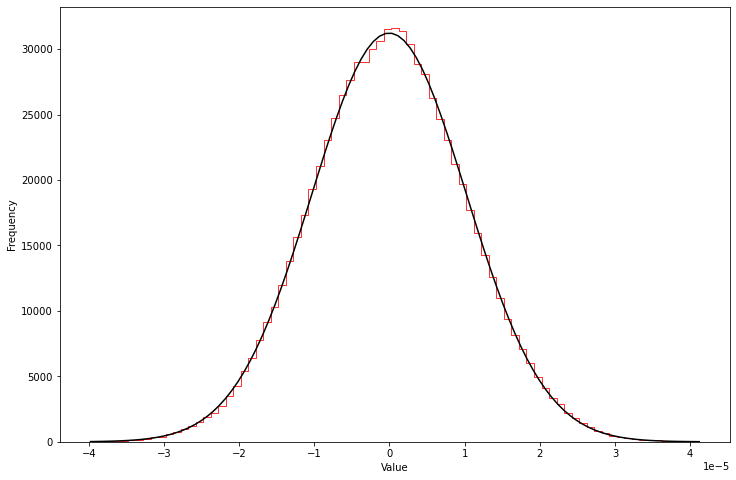

In [8]:
sci_noise=fits.open('SPT-CL_J2344-4243_band3_combined.jac.im.image.fits')[0]

def setup_plot(figsize, xlabel, ylabel):
    """ @brief Initialize basic plot parameters
        @param figsize Figure size
        @param xlabel X-axis label
        @param ylabel Y-axis label
    """

    plt.figure(figsize=figsize)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

noise=sci_noise.data
noise_m=np.nanmean(noise)
noise_var=np.nanvar(noise)
noise_min=np.nanmin(noise)
noise_max=np.nanmax(noise)
noise_size=0.0
for i in range (0, 2048):
    for j in range(0, 2048):
        if not np.isnan(noise[i][j]):
            noise_size += 1.0
print("Il rumore è mediato su " , noise_size , " valori.")

bins = np.arange(noise_min, noise_max, 0.000001)
x = np.linspace(noise_min, noise_max, 100)
def f(x , a , b , c):
    noise_gauss = 1./(np.sqrt(2.*np.pi*a)) * np.exp(-np.power((x-b)/np.sqrt(a), 2.)/2)
    noise_gauss_norm = noise_gauss * c * 0.000001
    return noise_gauss_norm

setup_plot((12,8), 'Value', 'Frequency')
plt.hist(noise.ravel(), bins=bins, histtype='step', linewidth=0.8, color='r') 




plt.plot(x, f(x , noise_var , noise_m , noise_size), color='black')
plt.show()


In [10]:
data_n=fits.open('SPT-CL_J2344-4243_band3_combined.dat.im.image.fits')[0].data

y=[]
err=[]
x_pix=[]
x_deg=[]
x_rad=[]

for i in range(0, 2048):
    for j in range(0, 2048):
        if not np.isnan(data_n[i][j]):
            
            err.append(np.sqrt(3*(noise_var + (noise_var/noise_size))))
            y.append(data_n[i][j]-noise_m)
            x_pix.append(r[0][i][j])
            x_deg.append(r[1][i][j])
            x_rad.append(r[2][i][j])
            
y=np.array(y)
x_pix=np.array(x_pix)
x_deg=np.array(x_deg)
x_rad=np.array(x_rad)


<ErrorbarContainer object of 3 artists>

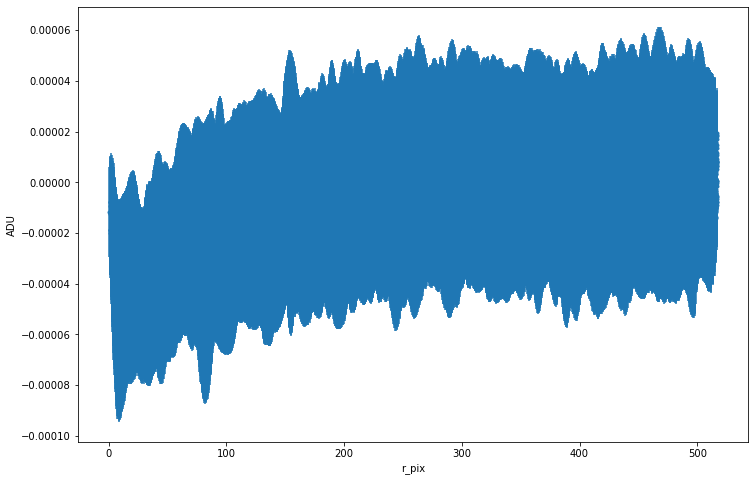

In [11]:
setup_plot((12,8), 'r_pix', 'ADU')
plt.errorbar(x_pix , y , err, fmt='.')

<ErrorbarContainer object of 3 artists>

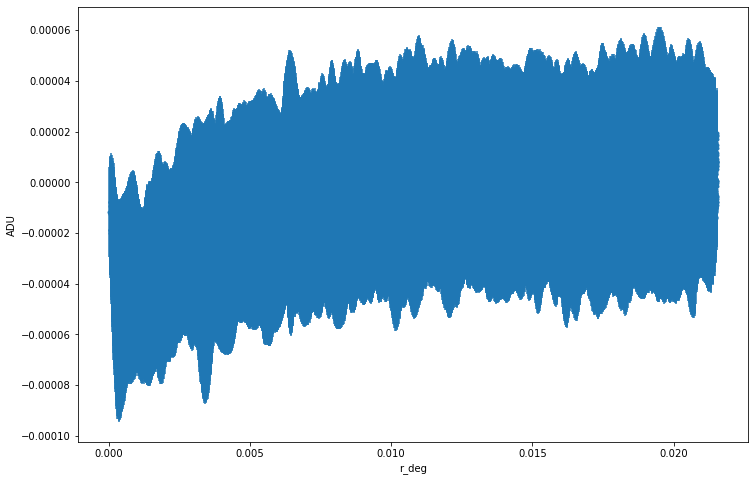

In [12]:
setup_plot((12,8), 'r_deg', 'ADU')
plt.errorbar(x_deg , y , err, fmt='.')

<ErrorbarContainer object of 3 artists>

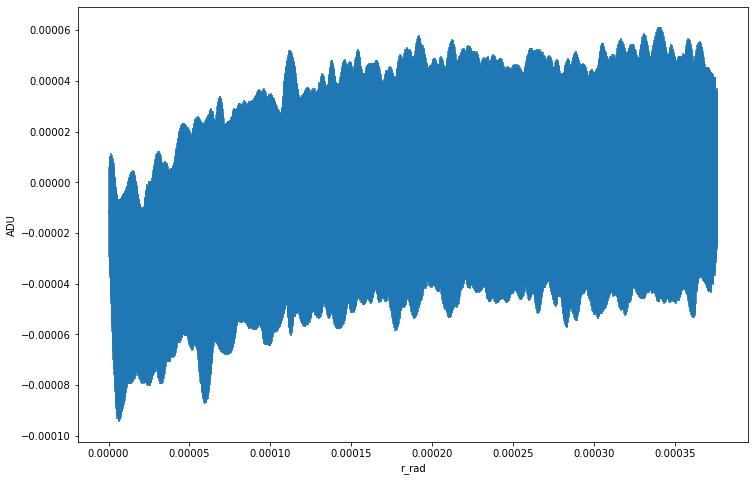

In [13]:
setup_plot((12,8), 'r_rad', 'ADU')
plt.errorbar(x_rad , y , err)